In [ ]:
# 导入必要的库
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 加载数据并划分数据集
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练 SVM 模型
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# 模型预测
y_pred = svm_model.predict(X_test)

# 模型评估
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# 可视化混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


类别标签： ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

数据集描述：
 .. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.f

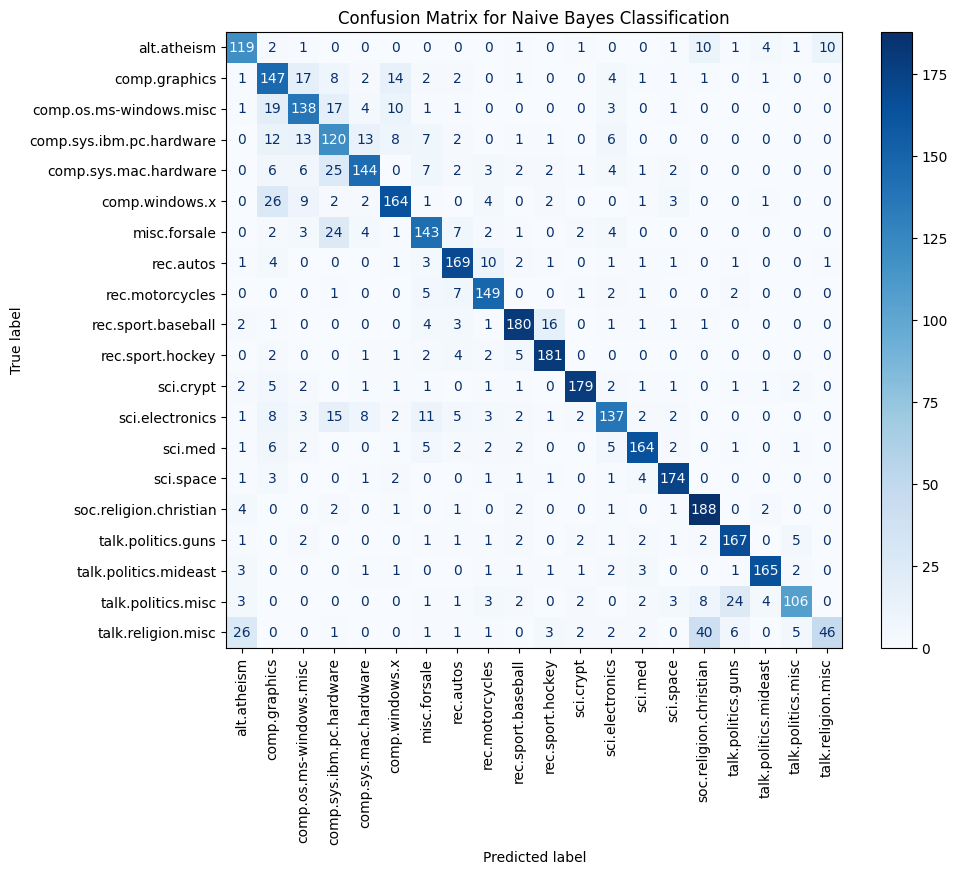

In [18]:
# 导入必要的库
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. 加载新闻数据
news_data = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

# 查看类别标签和数据集描述
print("类别标签：", news_data.target_names)  # 输出类别标签
print("\n数据集描述：\n", news_data.DESCR)  # 输出数据集描述

# 查看数据样本
print("\n数据样本示例：")
print("文本内容：", news_data.data[0])
print("对应的类别：", news_data.target_names[news_data.target[0]])
# 2. 文本数据转换为词袋模型
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)  # 使用TF-IDF表示
X = vectorizer.fit_transform(news_data.data)  # 转换文本数据
y = news_data.target  # 类别标签

# 3. 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 创建并训练朴素贝叶斯分类器
nb_model = MultinomialNB()  # 使用多项式朴素贝叶斯分类器
nb_model.fit(X_train, y_train)  # 训练模型

# 5. 使用测试集进行预测
y_pred = nb_model.predict(X_test)

# 6. 模型评估
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"\n模型评估指标：")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 7. 混淆矩阵的绘制
conf_matrix = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=news_data.target_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', ax=plt.gca())
plt.title("Confusion Matrix for Naive Bayes Classification")
plt.show()



In [ ]:
# 导入必要的库
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# 加载数据
iris = load_iris()
X = iris.data

# K-means聚类
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# PCA降维至2维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 可视化聚类结果（降维后）
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, label='Centroids')
plt.title('K-means Clustering (PCA Reduced)')
plt.legend()
plt.show()

# 聚类效果评估：轮廓系数
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Coefficient: {silhouette_avg}")

# 轮廓系数与聚类数关系图
silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    y_labels = kmeans_model.fit_predict(X)
    score = silhouette_score(X, y_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Coefficient vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.show()
